In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from collections import defaultdict

3483

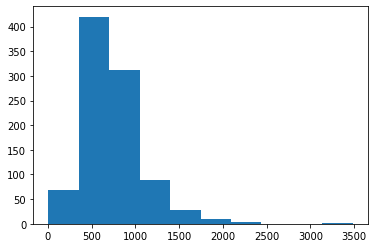

In [2]:
# for each student this is list of numerical id's for the URLs - removing duplicates
def get_trajectory(df):
    order = [0]
    for url in df['order']:
        if url != order[-1]:
            order.append(url)
    order.append(0)
    return order

trajectories = []

for fname in glob('data/MITxPRO+AMxB+1T2018/edges/*.csv'):
    df = pd.read_csv(fname)
    trajectories.append(df)
    
trajectories = pd.concat(trajectories)
trajectories = trajectories.groupby('user_id').apply(get_trajectory)
traj_lengths = trajectories.map(len).values

plt.hist(traj_lengths)
max(traj_lengths)
#trajectories[:25]

In [3]:
trajectories.iloc[[4,7]]

user_id
4637137    [0, 1, 2, 1, 4, 5, 6, 8, 9, 10, 11, 21, 28, 30...
5603337    [0, 1, 2, 4, 5, 6, 8, 9, 10, 9, 11, 10, 21, 28...
dtype: object

In [4]:
transition_counts = defaultdict(lambda : defaultdict(int))
state_counts = defaultdict(int)
len(trajectories)

index = np.arange(len(trajectories))
np.random.seed(9)
np.random.shuffle(index)

n = 3 #number of URL in a state
for i in index[:800]:
    traj = trajectories.iloc[i]
    state = n*[0]
    for url in traj[1:]:
        ts = tuple(state)
        transition_counts[ts][url] += 1
        state_counts[ts] += 1
        state.append(url)
        state = state[1:]


In [5]:
#transition_counts

In [6]:
# train?

correct = 0
total = 0
for i in index[:800]:
    traj = trajectories.iloc[i]
    state = n*[0]
    for url in traj[1:]:
        ts = tuple(state)
        if len(transition_counts[ts]) > 0:   
            most_likely_url = max(transition_counts[ts], key=transition_counts[ts].get)
            if most_likely_url == url:
                correct += 1
        total += 1
        state.append(url)
        state = state[1:]
correct / total

0.715998945927796

In [7]:
#test?

correct = 0
total = 0
for i in index[800:]:
    traj = trajectories.iloc[i]
    state = n*[0]
    for url in traj[1:]:
        ts = tuple(state)
        if len(transition_counts[ts]) > 0:   
            most_likely_url = max(transition_counts[ts], key=transition_counts[ts].get)
            if most_likely_url == url:
                correct += 1
        total += 1
        state.append(url)
        state = state[1:]
correct / total

0.5476712899991064

In [61]:
print(state_counts[(4,5,6)])
transition_counts[(4,5,6)]

701


defaultdict(int,
            {8: 552,
             5: 93,
             7: 36,
             10: 1,
             129: 1,
             0: 1,
             1: 3,
             128: 2,
             457: 1,
             2: 3,
             67: 1,
             61: 1,
             68: 1,
             9: 2,
             440: 1,
             69: 1,
             460: 1})